<a href="https://colab.research.google.com/github/NishdharaniP/Garbage_Classification_Colab/blob/main/GarbageClassification_AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import layers, models
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import pandas as pan
import warnings
warnings.filterwarnings('ignore')

In [3]:
image_data= '/content/drive/MyDrive/dl_dataset_garbage/garbage_classification'
pd.DataFrame(os.listdir(image_data), columns=['Files_Name'])

,Files_Name
0,plastic
1,trash
2,white-glass
3,cardboard
4,green-glass
5,paper
6,shoes
7,clothes
8,metal
9,brown-glass


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'shoes'),
  Text(1, 0, 'cardboard'),
  Text(2, 0, 'clothes'),
  Text(3, 0, 'white-glass'),
  Text(4, 0, 'metal'),
  Text(5, 0, 'brown-glass'),
  Text(6, 0, 'green-glass'),
  Text(7, 0, 'trash'),
  Text(8, 0, 'biological'),
  Text(9, 0, 'battery'),
  Text(10, 0, 'paper'),
  Text(11, 0, 'plastic')])

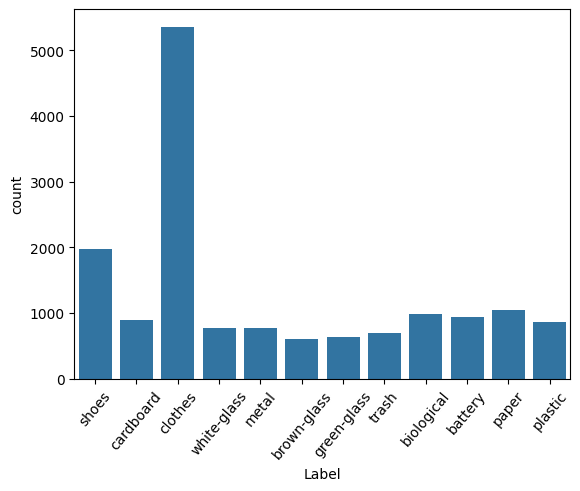

In [4]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns=["Image", "Label"])
sns.countplot(x=dataframe["Label"])
plt.xticks(rotation=50)

In [5]:
 train_data_dir = image_data
batch_size = 128
target_size = (224 ,224)
validation_split = 0.2


In [6]:
train = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=50,
    image_size=target_size,
    batch_size=batch_size,
)

Found 15548 files belonging to 12 classes.
Using 12439 files for training.


In [7]:
validation = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
class_names = train.class_names

Found 15548 files belonging to 12 classes.
Using 3109 files for validation.


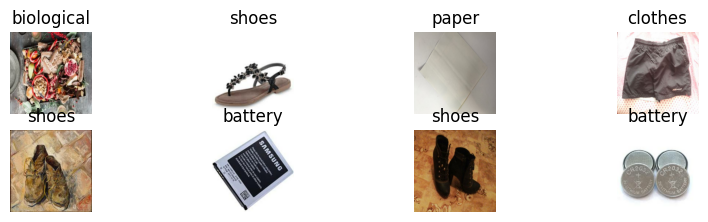

In [9]:
 plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [10]:
alexnet_model = models.Sequential([
    layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), padding='same', activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(256, kernel_size=(5,5), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(384, kernel_size=(3,3), padding='same', activation='relu'),
    layers.Conv2D(256, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=(2,2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(12, activation='softmax')  # 12 classes
])

In [11]:
alexnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 56, 56, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 12)             │        49,164 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,330,508 (222.51 MB)

 Trainable params: 58,330,508 (222.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
 checkpoint = ModelCheckpoint("alexnet_model.keras", save_best_only=True)

early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [13]:
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
hist = alexnet_model.fit(train, epochs=10, validation_data=validation, callbacks=[checkpoint, early_stopping])

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2408s 24s/step - accuracy: 0.3045 - loss: 71.8152 - val_accuracy: 0.3590 - val_loss: 2.0133
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2377s 24s/step - accuracy: 0.3859 - loss: 1.9240 - val_accuracy: 0.4635 - val_loss: 1.6340
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2370s 24s/step - accuracy: 0.4631 - loss: 1.6386 - val_accuracy: 0.5201 - val_loss: 1.4294
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2407s 24s/step - accuracy: 0.5120 - loss: 1.4864 - val_accuracy: 0.5658 - val_loss: 1.2975
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2356s 24s/step - accuracy: 0.5497 - loss: 1.3570 - val_accuracy: 0.5786 - val_loss: 1.2727
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2404s 24s/step - accuracy: 0.5724 - loss: 1.2780 - val_accuracy: 0.6356 - val_loss: 1.0967
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2380s 24s/step - accuracy: 0.6119 - loss: 1.1704 - val_accuracy: 0.6436 - val_loss: 1.0988
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 2358s 24s/step - accuracy: 0.6344 - loss: 1.0986 - val_acc

In [15]:
score, acc = alexnet_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)


25/25 ━━━━━━━━━━━━━━━━━━━━ 182s 7s/step - accuracy: 0.7152 - loss: 0.8544
Test Loss = 0.8970316052436829
Test Accuracy = 0.7015117406845093


In [16]:
hist_ = pd.DataFrame(hist.history)

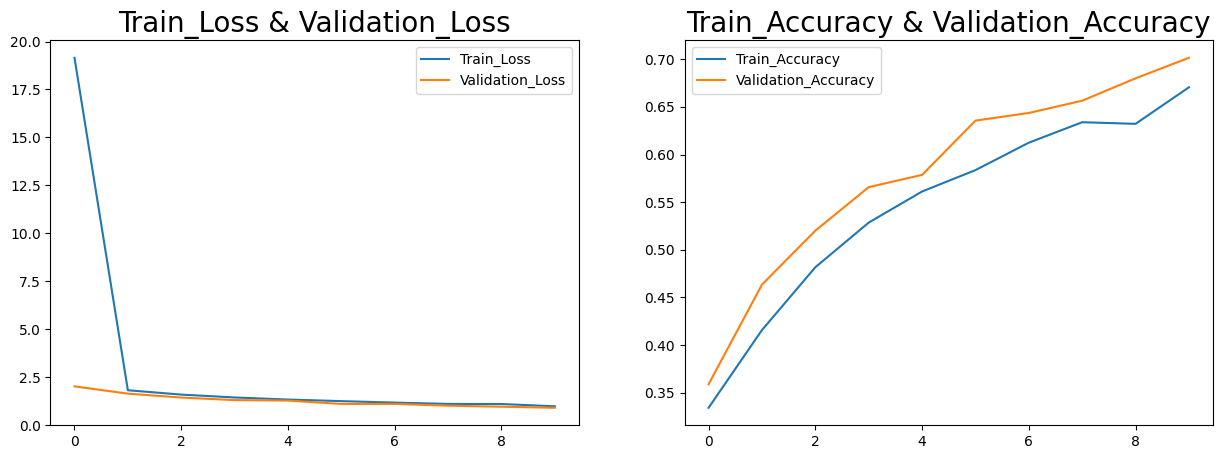

In [17]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'], label='Train_Loss')
plt.plot(hist_['val_loss'], label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss', fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'], label='Train_Accuracy')
plt.plot(hist_['val_accuracy'], label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy', fontsize=20)
plt.legend()

In [18]:
X_val, y_val, y_pred = [], [], []
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions = alexnet_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df = pd.DataFrame()
df['Actual'], df['Prediction'] = y_val, y_pred
df

98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step


,Actual,Prediction
0,4,4
1,4,4
2,4,4
3,4,4
4,4,4
...,...,...
3104,8,8
3105,6,9
3106,4,4
3107,8,4


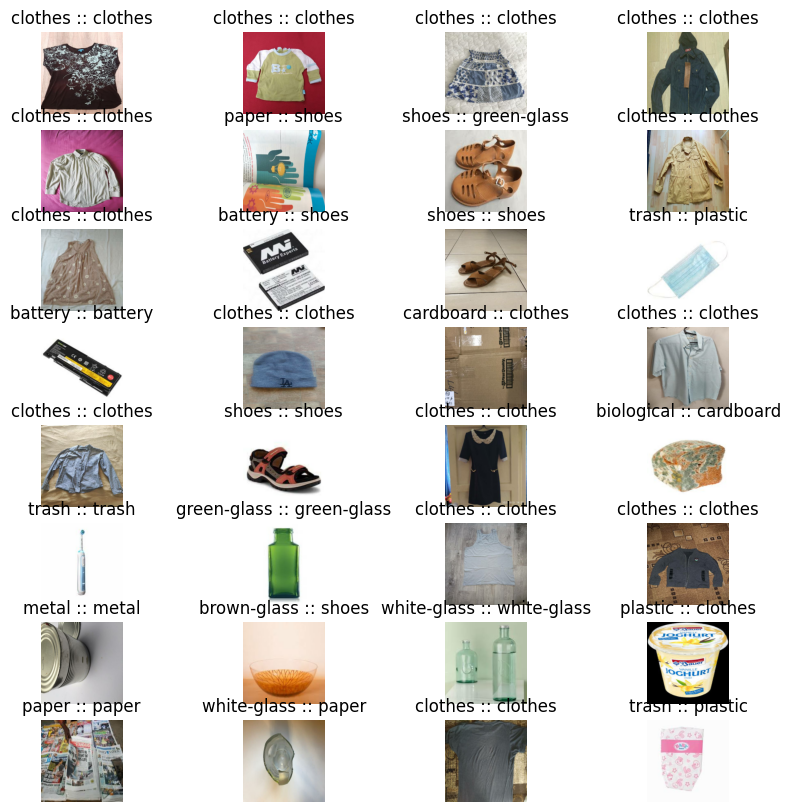

In [19]:
plt.figure(figsize=(10,10))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

In [20]:
alexnet_model.save('alexnet_model.h5')


In [21]:
from tensorflow.keras.models import load_model

model = load_model('alexnet_model.keras')


In [22]:
score, acc = model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)


25/25 ━━━━━━━━━━━━━━━━━━━━ 153s 6s/step - accuracy: 0.7096 - loss: 0.8933
Test Loss = 0.8970316052436829
Test Accuracy = 0.7015117406845093
